# 데이터 정제

데이터는 2013-01-01 부터 2017-08-15 까지 있음

In [31]:
import pandas as pd
data = pd.read_csv('sales_raw.csv')
data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [32]:
data = data[['date','store_nbr','family','sales']]
data.columns = ['ds', 'store_id', 'product_id', 'y']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['product_id'] = encoder.fit_transform(data['product_id'])
print(data)
data.to_csv('sales_modified.csv')

/var/folders/4r/y8vzqpyx13b1xvb25jj5rhp40000gn/T/ipykernel_62276/2192827913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_id'] = encoder.fit_transform(data['product_id'])


                 ds  store_id  product_id         y
0        2013-01-01         1           0     0.000
1        2013-01-01         1           1     0.000
2        2013-01-01         1           2     0.000
3        2013-01-01         1           3     0.000
4        2013-01-01         1           4     0.000
...             ...       ...         ...       ...
3000883  2017-08-15         9          28   438.133
3000884  2017-08-15         9          29   154.553
3000885  2017-08-15         9          30  2419.729
3000886  2017-08-15         9          31   121.000
3000887  2017-08-15         9          32    16.000

[3000888 rows x 4 columns]


아이템 하나씩 분리해서 데이터프레임 생성  
분리하며 target 데이터를 ds와 y로 전처리

In [33]:
data = pd.read_csv('sales_modified.csv', index_col=0)
data = data[data['store_id'] == 1]

items = []
for i in data['product_id'].unique():
    item = data[data['product_id'] == i]
    # item = data[['ds', 'y']]
    items.append(item)

In [34]:
items[0]

,ds,store_id,product_id,y
0,2013-01-01,1,0,0.0
1782,2013-01-02,1,0,2.0
3564,2013-01-03,1,0,3.0
5346,2013-01-04,1,0,3.0
7128,2013-01-05,1,0,5.0
...,...,...,...,...
2991978,2017-08-11,1,0,1.0
2993760,2017-08-12,1,0,6.0
2995542,2017-08-13,1,0,1.0
2997324,2017-08-14,1,0,1.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -22.3322
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      54       2566.88   0.000473701       99.6183    5.59e-06       0.001      106  LS failed, Hessian reset 
      99       2566.93    0.00067725       78.0338           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       2567.05   3.82787e-05       73.4761   4.984e-07       0.001      275  LS failed, Hessian reset 
     199       2567.06   5.02739e-06       65.0478           1           1      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       2567.16   1.01751e-05       62.4246   1.686e-07       0.001      483  LS failed, Hessian reset 
     299       2567.16   1.41609e-05       69.7656           1           1      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


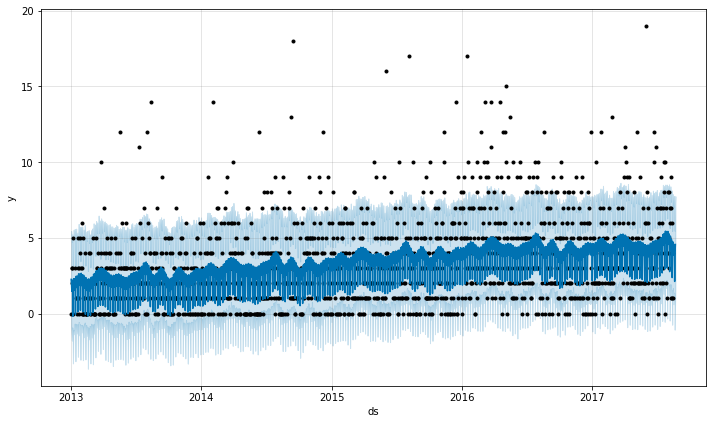

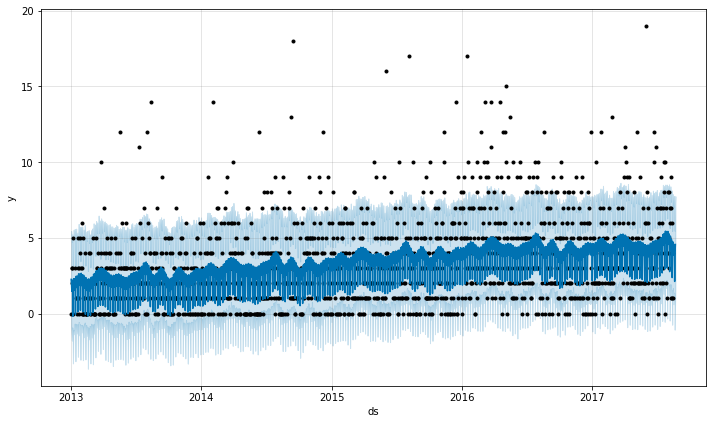

In [35]:
from prophet import Prophet

prophet = Prophet()
prophet.fit(items[0])

future = prophet.make_future_dataframe(periods=7, freq='D')

forecast = prophet.predict(future)
# print(forecast[['ds', 'yhat','yhat_lower','yhat_upper']])

prophet.plot(forecast)

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


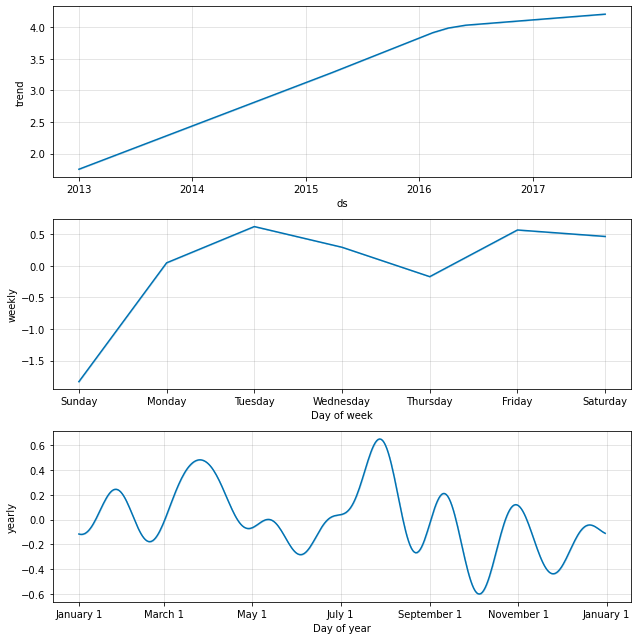

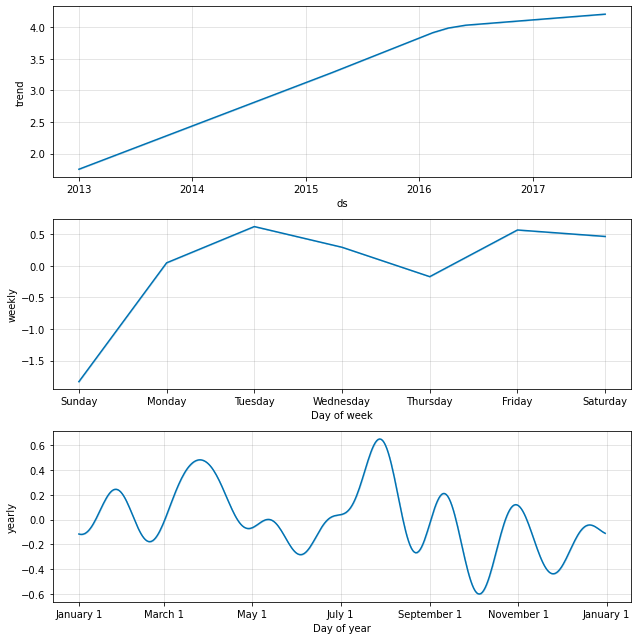

In [36]:
prophet.plot_components(forecast)